# Intercalating DNA stain filters

Given incomplete knowledge on sources/spectra of BG, what order should we try filters in when testing signal:BG in DNA-dye:bead experiments (Mei, [#202 Can we detect DNA for 50:1 beads using intercalating dyes on 2D surface?](https://docs.google.com/presentation/d/1Ut4rE0M3jk5m7Pff9tvPUMrRx8rpigkMFiaEEKNk0V8/edit?ts=59536f70#slide=id.g21e8f54bd7_0_5))


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from dye import Dye
from laser import Laser
from filterCube import FilterCube
from camera import Camera
from objective import Objective
import utils
from crosstalk_analysis import signalFromDyeXInChannelY
from crosstalk_analysis import displayCrosstalkPlot

%matplotlib notebook

dyesPath = 'Dye spectra/'
filtersPath = 'Filter spectra/'
opticsPath =  'Optics spectra/'
cameraPath = 'Camera spectra/'

Initialise dyes and filter cubes. 

Sources: 

http://solioz-scientific.ch/knowledge/SYBR_green_I.pdf
http://theinstituteoffluorescence.com/Publication%202/JoFL%20paper.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2532517/



In [3]:
dyeSG = Dye(name = 'SYBR Green', epsilon = 75000, qy = 0.8, 
             absSpectrum = os.path.join(dyesPath, 'SYBRGreen.abs.txt'), 
             emSpectrum = os.path.join(dyesPath, 'SYBRGreen.ems.txt'))

dyeYOYO = Dye(name = 'YOYO-1', epsilon = 98900, qy = 0.52, 
             absSpectrum = os.path.join(dyesPath, 'YOYO1.abs.txt'), 
             emSpectrum = os.path.join(dyesPath, 'YOYO1.ems.txt'))

l488 = Laser(channel = 'L488Nm', centreWavelengthNm = 488, fwhmNm = 0.01, 
             laserOutputPowerMw = 10)

cube517 = FilterCube(channel = '517/20 filter', 
                   excitationFilter = ( 'FF01-482_18', os.path.join(filtersPath, 'FF02-482_18_Spectrum.txt') ), 
                   dichroicFilter = ( 'Di02-R488', os.path.join(filtersPath, 'Di02-R488_Spectrum.txt') ), 
                   emissionFilter = ( 'FF01-517_20', os.path.join(filtersPath, 'FF01-517_20_Spectrum.txt') ) )

cube532 = FilterCube(channel = '532/10, narrowest available', 
                   excitationFilter = ( 'FF01-482_18', os.path.join(filtersPath, 'FF02-482_18_Spectrum.txt') ), 
                   dichroicFilter = ( 'Di02-R488', os.path.join(filtersPath, 'Di02-R488_Spectrum.txt') ), 
                   emissionFilter = ( 'Chroma 532_10', os.path.join(filtersPath, 'Chroma 532_10.txt') ) )

cubeClaire = FilterCube(channel = '534/20, close to Claire spec', 
                   excitationFilter = ( 'FF01-482_18', os.path.join(filtersPath, 'FF02-482_18_Spectrum.txt') ), 
                   dichroicFilter = ( 'Di02-R488', os.path.join(filtersPath, 'Di02-R488_Spectrum.txt') ), 
                   emissionFilter = ( 'FF01-534_20', os.path.join(filtersPath, 'FF01-534_20_Spectrum.txt') ) )

camera = Camera(name = 'Andor Zyla 5.5', 
                qeCurve = os.path.join(cameraPath, 'Camera sCMOS (Andor- Zyla 5.5).txt'))

objective = Objective(name = 'Olympus UPLANSAPO20x 0.75NA', 
                      transmissionCurve = os.path.join(opticsPath, 'Olympus UPLANSAPO20x.txt'))

<IPython.core.display.Javascript object>


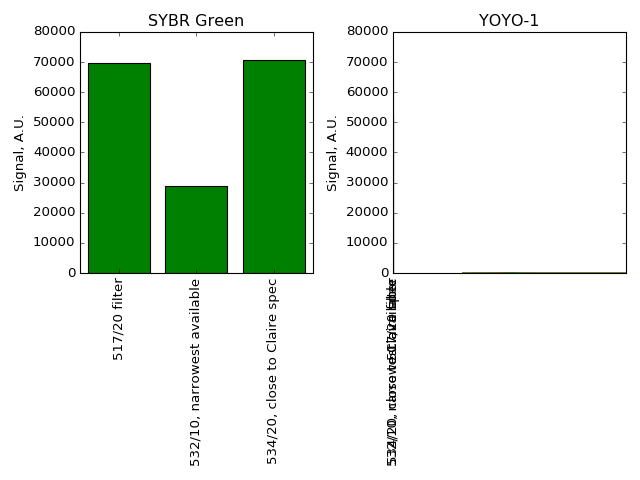

In [4]:
cubes = [cube517, cube532, cubeClaire]
dyes = [dyeSG, dyeYOYO]

cubelist = [cube.channel for cube in cubes]
dyelist = [dye.name for dye in dyes]

for idx, dye in enumerate(dyes):
    sig = []
    for cube in cubes:
        sig.append(signalFromDyeXInChannelY(l488, cube, dye, objective, camera)[2])
    x = np.linspace(1,len(cubes), len(cubes))
    ax = plt.subplot(1, len(dyes), idx+1)
    plt.bar(x, sig, tick_label=cubelist, align='center', color='g')
    plt.xticks(x, cubelist, rotation='vertical')
    plt.ylim([0, 80000])
    plt.ylabel('Signal, A.U.')
    plt.title(dye.name)
    plt.tight_layout()

plt.show()



<IPython.core.display.Javascript object>


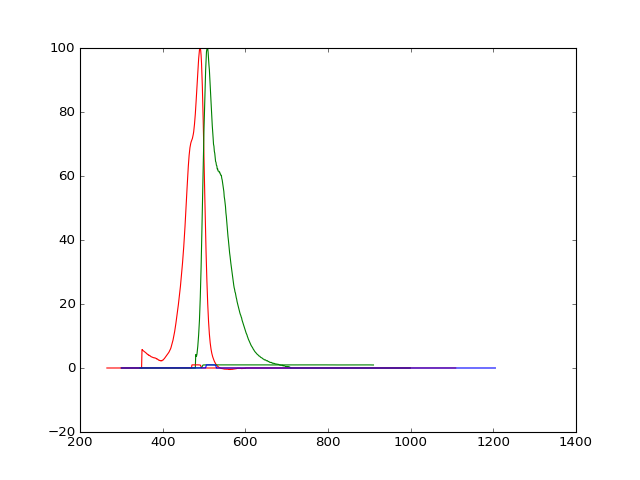

In [7]:
plt.figure()
dyeYOYO.displaySpectra()
cube517.displaySpectra()
